C:\Users\vsuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vsuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vsuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vsuri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

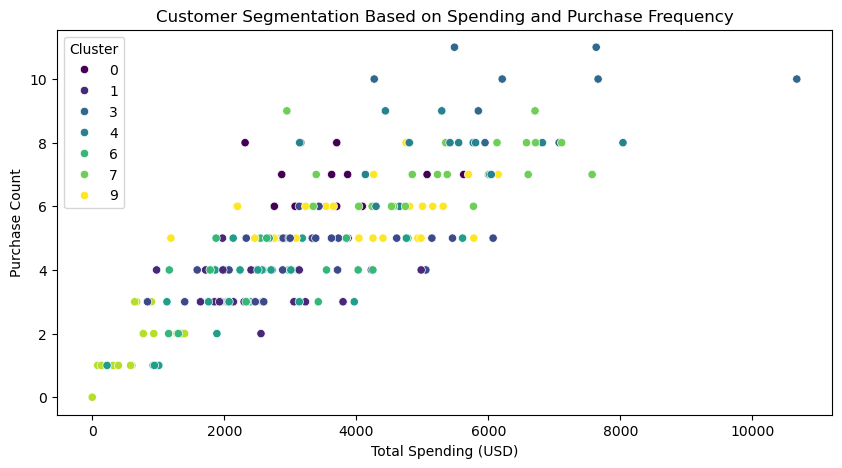

Optimal Clusters: 10, DB Index: 1.0811917116660845
Customer segmentation completed. Results saved in Suriya V_Clustering.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Aggregate transaction data per customer
customer_features = transactions.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_quantity=("Quantity", "mean"),
    purchase_count=("TransactionID", "count"),
    unique_products=("ProductID", "nunique")
).reset_index()

# Merge with customer profile data
customer_data = customers.merge(customer_features, on="CustomerID", how="left").fillna(0)

# Encode categorical variables (Region)
customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)

# Standardize numerical features
feature_columns = ["total_spent", "avg_quantity", "purchase_count", "unique_products"] + list(customer_data.columns[5:])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[feature_columns])

# Finding optimal number of clusters using DB Index
db_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, labels)
    db_scores.append(db_index)
    
# Select optimal cluster count
optimal_clusters = cluster_range[np.argmin(db_scores)]

# Apply KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)

# Visualization of clusters
plt.figure(figsize=(10,5))
sns.scatterplot(x=customer_data["total_spent"], y=customer_data["purchase_count"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segmentation Based on Spending and Purchase Frequency")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Purchase Count")
plt.show()

# Print DB Index
print(f"Optimal Clusters: {optimal_clusters}, DB Index: {min(db_scores)}")

# Save results
customer_data.to_csv("Suriya V_Clustering.csv", index=False)
print("Customer segmentation completed. Results saved in Suriya V_Clustering.csv")


In [4]:
pip install nomkl

Note: you may need to restart the kernel to use updated packages.
